# K-Nearest Neighbors
### Modelo 05
- CountVectorizer
- Base A


#### Imports necessarios para funcionamento da aplicacao

In [1]:
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score
from nltk import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

#### Leitura do arquivo de dados

In [2]:
df = pd.read_csv('../../base_a.csv')

df.head()

,nome,categoria
0,1051 SUCO DE UVA,SUCO UVA
1,110 PEPSI LIGHT,PEPSI
2,2L COCA COLA,COCA-COLA
3,AGUA SABORIZADA SPRITE LEMON FRESH 510ML,SPRITE
4,AGUA SPRITE,SPRITE


#### Efetua o tratamento dos dados

In [3]:
le = LabelEncoder()

df.categoria = le.fit_transform(df.categoria)

df.head()

,nome,categoria
0,1051 SUCO DE UVA,13
1,110 PEPSI LIGHT,8
2,2L COCA COLA,2
3,AGUA SABORIZADA SPRITE LEMON FRESH 510ML,10
4,AGUA SPRITE,10


#### Função de tokenização

In [4]:
stemmer = RSLPStemmer()

def token(text):
    text = re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', text)
    txt = word_tokenize(text.lower())
    return [stemmer.stem(word) for word in txt]

#### Separa base de treino e teste

In [5]:
X_train,X_test,y_train,y_test = train_test_split(
    df.nome, 
    df.categoria,
    test_size = 0.3, 
    random_state = 42
)

#### Define CountVectorizer

In [6]:
count_vectorizer = CountVectorizer(
    tokenizer=token,
    ngram_range=(1,2)
)

#### Cria vocabulário

In [7]:
X_train = count_vectorizer.fit_transform(X_train.values)

## Etapa de treinamento
#### Busca melhor valor para k

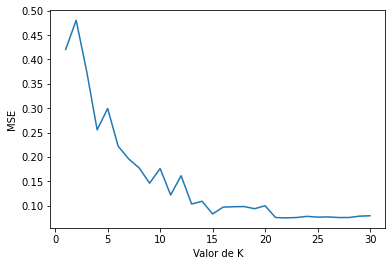

In [8]:
best_rmse = 1
k_neighbors = 0

k_range = range(1, 31)
k_scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
    if loss.mean() < best_rmse:
        best_rmse = loss.mean()
        k_neighbors = k
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K')
plt.ylabel('MSE')
plt.show()

#### Cria um classificador kNN

In [9]:
knn = KNeighborsClassifier(n_neighbors = k_neighbors)

#### Treina o classificador

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

## Etapa de Teste

#### Efetua a predição

In [11]:
Y_Pred = knn.predict(count_vectorizer.transform(X_test).toarray())

#### Calcula a acurácia do classificador

In [12]:
print('acuracia: {:.1f}'.format(accuracy_score(y_test, Y_Pred) * 100))
print('precisao: {:.1f}'.format(precision_score(y_test, Y_Pred, average="weighted") * 100))

acuracia: 95.6
precisao: 96.1


#### Tabela com os itens classificados errados na base de teste

In [13]:
d = []

for i in range(len(X_test)):
    au = count_vectorizer.transform([X_test.values[i]])
    pred = knn.predict(au.toarray())
    if (y_test.values[i] != pred[0]):
        d.append(
            [
                X_test.values[i],
                le.inverse_transform([y_test.values[i]])[0],
                le.inverse_transform(pred)[0]
            ]
        )

df_error = pd.DataFrame(data=d,columns=['Nome','Categoria Original','Pred'])
df_error

,Nome,Categoria Original,Pred
0,SUCO E SO LARANJA INTEGRAL GF 300ML,SUCO LARANJA INTEGRAL,SUCO LARANJA
1,SUCO DE LARANJA INTEGRAL PRATS 900ML,SUCO LARANJA INTEGRAL,SUCO LARANJA
2,SUCO AURORA INT UVA BCO 1.5L,SUCO UVA INTEGRAL,SUCO UVA
3,REFRI COCA COLA ZERO,COCA-COLA ZERO,COCA-COLA
4,SUCO INTEGRAL DE LARANJA 300ML,SUCO LARANJA INTEGRAL,SUCO LARANJA
5,REF LATA FANTA GUARANA 220ML,GUARANA ANTARTICA,FANTA
6,REFR GUARANA KUAT 35,KUAT,GUARANA ANTARTICA
7,GV SUCO DE UVA INTEG,SUCO UVA INTEGRAL,SUCO UVA
8,SUCO LARANJA INTEGRAL 300ML NAT ONE,SUCO LARANJA INTEGRAL,SUCO LARANJA
9,SUCO KAPO LARANJA INF 200ML,SUCO LARANJA INTEGRAL,SUCO LARANJA


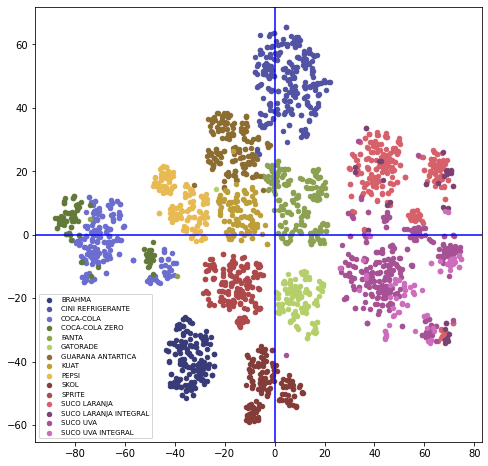

In [14]:
model = TSNE(n_components=2, init='pca', random_state=0)
transformed = model.fit_transform(X_train.todense())

fig, ax = plt.subplots(figsize=(8,8))

for g in np.unique(y_train):
    ix = np.where(y_train == g)
    ax.scatter(transformed[:,0][ix], transformed[:,1][ix], c=[plt.cm.tab20b(float(g)/15)], s=20, label = le.inverse_transform([g])[0])

plt.legend(loc='lower left',fontsize=7)
plt.axhline(color='b')
plt.axvline(color='b')
plt.show()

#### Matriz de Confusão

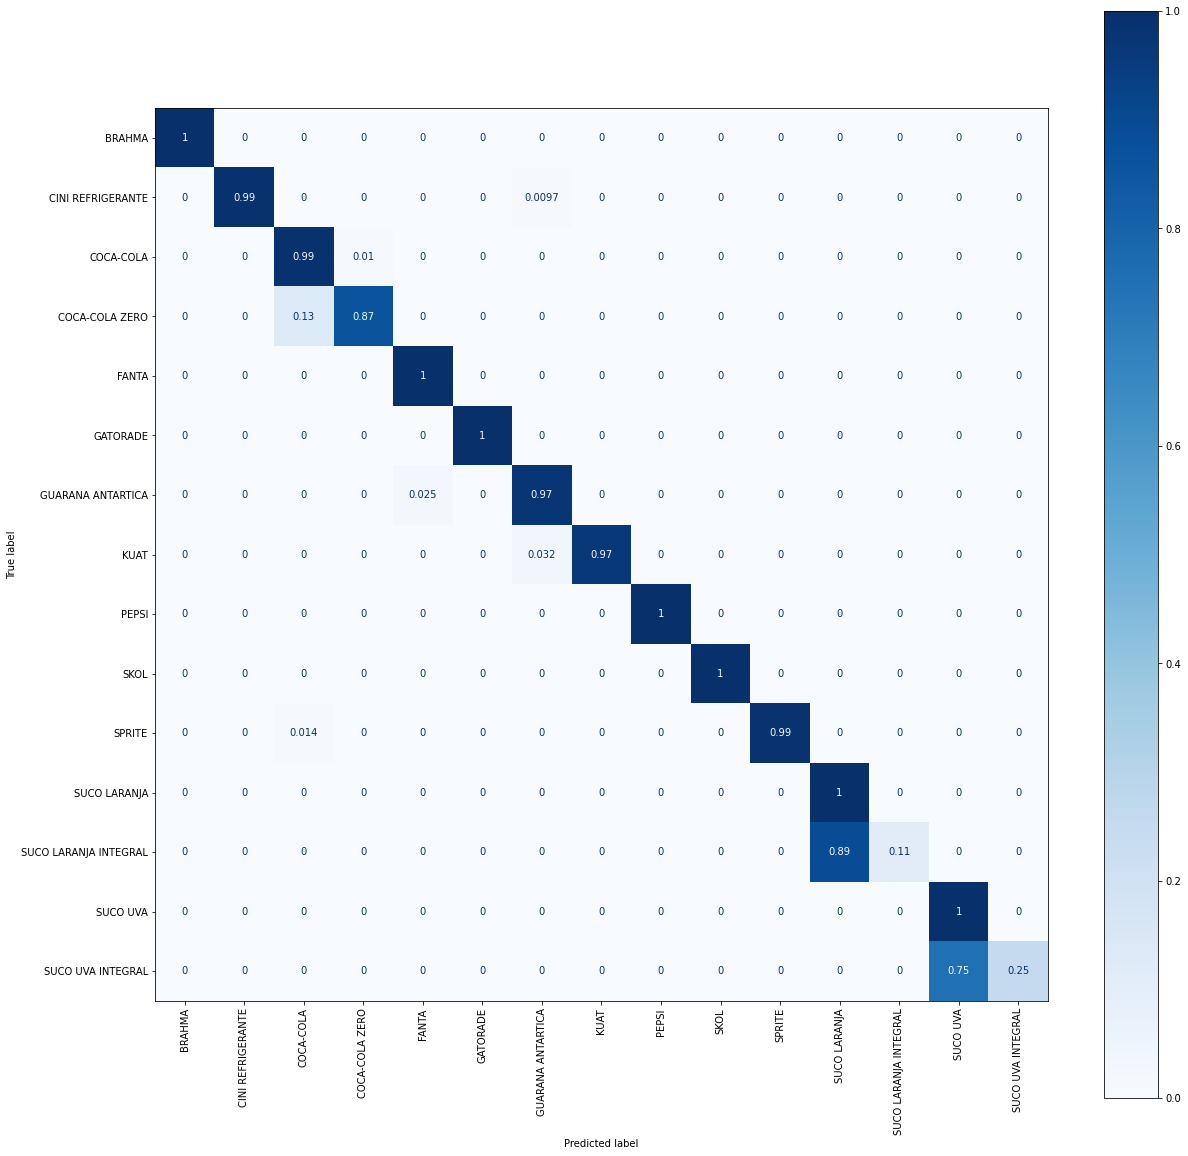

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(
    knn,
    count_vectorizer.transform(X_test).toarray(),
    y_test,
    display_labels=np.unique(le.inverse_transform(y_test)),
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax,
    xticks_rotation='vertical'
)